Ali Amsali
1217070011
Latihan 1
Latihan 1 Machine Learning

In [ ]:
!pip install nltk scikit-learn matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/ISEAR.csv'
df = pd.read_csv(data_path, header=None)

print(df.head())

         0                                                  1    2
0      joy  On days when I feel close to my partner and ot...  NaN
1     fear  Every time I imagine that someone I love or I ...  NaN
2    anger  When I had been obviously unjustly treated and...  NaN
3  sadness  When I think about the short time that we live...  NaN
4  disgust  At a gathering I found myself involuntarily si...  NaN


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

df['processed'] = df[1].apply(preprocess_text)
print(df['processed'].head())

X_train, X_test, y_train, y_test = train_test_split(df['processed'], df[0], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(tokenizer=lambda i: i, lowercase=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_vect, y_train)
y_pred_nb = nb.predict(X_test_vect)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

clf = svm.SVC()
clf.fit(X_train_vect, y_train)
y_pred_svm = clf.predict(X_test_vect)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [day, feel, close, partner, friend, feel, peac...
1    [everi, time, imagin, someon, love, could, con...
2            [obvious, unjust, treat, possibl, elucid]
3    [think, short, time, live, relat, period, life...
4    [gather, found, involuntarili, sit, next, two,...
Name: processed, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Naive Bayes Classification Report:
               precision    recall  f1-score   support

       anger       0.49      0.37      0.42       348
     disgust       0.61      0.52      0.56       301
        fear       0.56      0.64      0.60       307
       guilt       0.42      0.45      0.44       313
         joy       0.58      0.70      0.64       323
     sadness       0.59      0.59      0.59       340
       shame       0.45      0.43      0.44       323

    accuracy                           0.53      2255
   macro avg       0.53      0.53      0.53      2255
weighted avg       0.53      0.53      0.53      2255

SVM Classification Report:
               precision    recall  f1-score   support

       anger       0.46      0.53      0.49       348
     disgust       0.56      0.58      0.57       301
        fear       0.65      0.67      0.66       307
       guilt       0.49      0.45      0.47       313
         joy       0.66      0.73      0.70       323
     sadness  

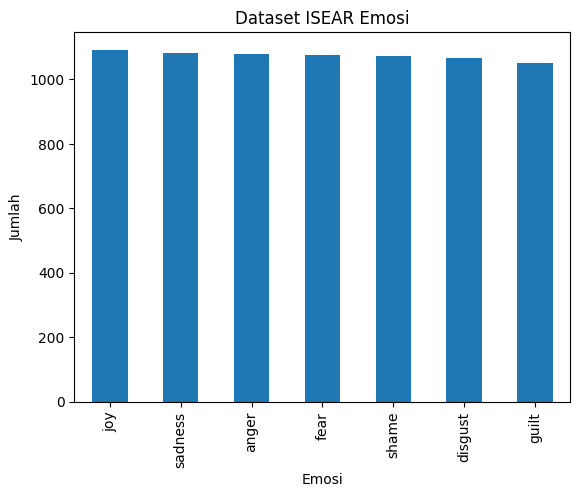

In [ ]:
import matplotlib.pyplot as plt

df[0].value_counts().plot(kind='bar')
plt.title('Dataset ISEAR Emosi')
plt.xlabel('Emosi')
plt.ylabel('Jumlah')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['processed_text'] = df[1].apply(preprocess_text)
print(df['processed_text'].head())

X = df['processed_text']
y = df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    day feel close partner friend feel peac also e...
1    everi time imagin someon love could contact se...
2                obvious unjustli treat possibl elucid
3    think short time live relat period life think ...
4    gather found involuntarili sit next two peopl ...
Name: processed_text, dtype: object


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

y_pred_nb = nb_model.predict(X_test_vect)

print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

svm_model = svm.SVC()
svm_model.fit(X_train_vect, y_train)

y_pred_svm = svm_model.predict(X_test_vect)

print("Classification Report SVM:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Classification Report Naive Bayes:
              precision    recall  f1-score   support

       anger       0.53      0.39      0.45       348
     disgust       0.61      0.55      0.58       301
        fear       0.55      0.68      0.61       307
       guilt       0.47      0.47      0.47       313
         joy       0.59      0.72      0.65       323
     sadness       0.62      0.60      0.61       340
       shame       0.46      0.44      0.45       323

    accuracy                           0.55      2255
   macro avg       0.55      0.55      0.55      2255
weighted avg       0.55      0.55      0.55      2255

Confusion Matrix Naive Bayes:
[[137  37  37  49  24  28  36]
 [ 28 166  21  19  18  16  33]
 [ 14   6 209  13  25  25  15]
 [ 35  13  28 148  20  25  44]
 [  7   8  22  15 233  22  16]
 [ 14  14  29  19  39 204  21]
 [ 22  30  34  49  34  11 143]]
Classification Report SVM:
              precision    recall  f1-score   support

       anger       0.47      0.51     

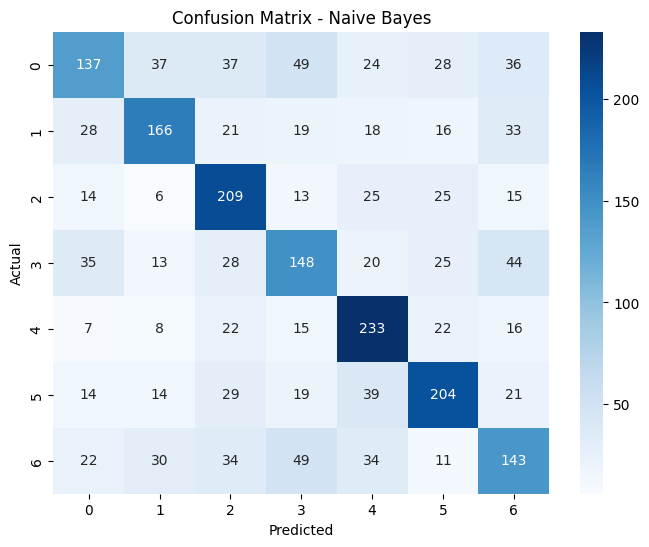

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()